# Gowdy Metric
##  Geoff Cope
##  University of Utah
##  December 22, 2021

This particular form of the Gowdy Metric is taken from: "Numerical Investigation of Cosmological Singularities" by Berger and Moncrief.  See Equation 3.1  We will derive the field equations later

https://arxiv.org/abs/gr-qc/9307032

IMPORTANT:  SEE BOTTOM OF PAGE 7 OF THE ABOVE PAPER:  "THE SYMPLECTIC INTEGRATION ALGORITHM HAS SIGNIFICANT ADVANTAGES OVER THE LEAP FROG SCHEME FOR OUR PROBLEM OF THE APPROACH TO THE SINGULARITY".  GO BACK AND READ ABOUT SYMPLECTIC INTEGRATOR IN PAPER BELOW

https://arxiv.org/abs/2010.02237

The exact form of the metric corresponds with equation 12 in Garinkle's paper: "Harmonic coordinate method for simulating generic singularities" linked below:  (also appears on page 353 equation 18.14 of "Conformal Structure of Space-Time" )

https://arxiv.org/abs/gr-qc/0110013

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
tau,Lambda,z,x,y,dtau,dz,dx,dy = symbols( 'tau Lambda z x y dtau dz dx dy' ) 

In [4]:
variables = Matrix([tau,z,x,y])
variables

⎡τ⎤
⎢ ⎥
⎢z⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [5]:
differentials = Matrix([dtau,dz,dx,dy])
differentials 

⎡dtau⎤
⎢    ⎥
⎢ dz ⎥
⎢    ⎥
⎢ dx ⎥
⎢    ⎥
⎣ dy ⎦

In [6]:
P = Function('P')(tau,z)
P

In [7]:
Q = Function('Q')(tau,z)
Q

In [8]:
Lambda = Function('lambda')(tau,z)
Lambda

In [9]:
lineElement = expand(exp((tau-Lambda)/2) * ( (-1)*exp(-2*tau)*dtau**2 + dz**2) + exp(-tau) * (( exp(P) * dx**2 + 2*exp(P)*Q*dx*dy) + ( (exp(P) * Q**2 + exp((-1)*P)) * dy**2 ) ))
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  -3⋅τ   -Λ(τ, z)                                                                             ⎤
⎢  ─────  ─────────                                                                            ⎥
⎢    2        2                                                                                ⎥
⎢-ℯ     ⋅ℯ                 0                 0                              0                  ⎥
⎢                                                                                              ⎥
⎢                     τ  -Λ(τ, z)                                                              ⎥
⎢                     ─  ─────────                                                             ⎥
⎢                     2      2                                                                 ⎥
⎢        0           ℯ ⋅ℯ                    0                              0                  ⎥
⎢                                                                                              ⎥
⎢                             

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡  -3⋅τ   -Λ(τ, z)                                                                             ⎤
⎢  ─────  ─────────                                                                            ⎥
⎢    2        2                                                                                ⎥
⎢-ℯ     ⋅ℯ                 0                 0                              0                  ⎥
⎢                                                                                              ⎥
⎢                     τ  -Λ(τ, z)                                                              ⎥
⎢                     ─  ─────────                                                             ⎥
⎢                     2      2                                                                 ⎥
⎢        0           ℯ ⋅ℯ                    0                              0                  ⎥
⎢                                                                                              ⎥
⎢                             

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("tau z x y")
tau,z,x,y = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡  ∂                     ∂                                                                                                
⎢⎢  ──(Λ(τ, z))          -──(Λ(τ, z))                                                                                      
⎢⎢  ∂τ            3       ∂z                                                                                               
⎢⎢- ─────────── - ─      ─────────────                                        0                                            
⎢⎢       4        4            4                                                                                           
⎢⎢                                                                                                                         
⎢⎢   ∂               ⎛    ∂          ⎞  2⋅τ                                                                                
⎢⎢  -──(Λ(τ, z))     ⎜1 - ──(Λ(τ, z))⎟⋅ℯ                                                                                   
⎢⎢   ∂z 

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                              2                                     2                                     
⎢                          2                  ∂                          2    -2⋅τ  ∂                                      
⎢   2⋅P(τ, z) ⎛∂          ⎞    ∂             ───(Λ(τ, z))   ⎛∂          ⎞    ℯ    ⋅───(Λ(τ, z))      2⋅P(τ, z) ∂           
⎢  ℯ         ⋅⎜──(Q(τ, z))⎟    ──(Λ(τ, z))     2            ⎜──(P(τ, z))⎟            2              ℯ         ⋅──(Q(τ, z))⋅
⎢             ⎝∂τ         ⎠    ∂τ            ∂τ             ⎝∂τ         ⎠          ∂z                          ∂τ          
⎢- ───────────────────────── + ─────────── + ──────────── - ────────────── - ──────────────────   - ───────────────────────
⎢              2                    2             4               2                  4                              2      
⎢                                                                                                                          
⎢       

In [23]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

KeyboardInterrupt: 

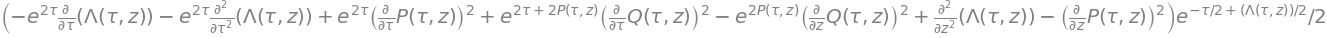

In [28]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [ ]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

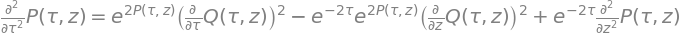

In [31]:
equation3pt2 = Eq(diff(P,tau,tau),expand(solve( Ric.tensor()[2,2] , diff(P,tau,tau))[0]))
equation3pt2

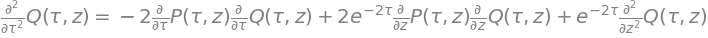

In [59]:
equation3pt3 = Eq(diff(Q,tau,tau),expand(solve( simplify(Ric.tensor()[3,2].subs(equation3pt2.args[0],equation3pt2.args[1] )).args[0], diff(Q,tau,tau) )[0] ))
equation3pt3

In [32]:
equation3pt4 = Eq(diff(Lambda,z),solve( simplify(einst.tensor()[1,0]), diff(Lambda,z))[0])
equation3pt4

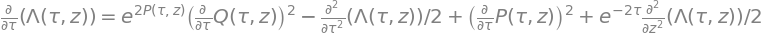

In [39]:
Eq(diff(Lambda,tau),solve( Ric.tensor()[0,0], diff(Lambda,tau))[0])

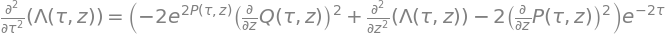

In [42]:
d2lambdadtau2 = Eq(diff(Lambda,tau,tau),solve( Ric.tensor()[1,1], diff(Lambda,tau,tau))[0])
d2lambdadtau2

In [47]:
equation3pt5 = simplify(Eq(diff(Lambda,tau),solve( Ric.tensor()[0,0], diff(Lambda,tau))[0]).subs(d2lambdadtau2.args[0],d2lambdadtau2.args[1]))
equation3pt5

In [61]:
vacuumFieldEquations = Matrix([equation3pt2,equation3pt3,equation3pt4,equation3pt5])
vacuumFieldEquations

⎡            2                                    2                                 2           2                    ⎤
⎢           ∂              2⋅P(τ, z) ⎛∂          ⎞     -2⋅τ  2⋅P(τ, z) ⎛∂          ⎞     -2⋅τ  ∂                     ⎥
⎢          ───(P(τ, z)) = ℯ         ⋅⎜──(Q(τ, z))⎟  - ℯ    ⋅ℯ         ⋅⎜──(Q(τ, z))⎟  + ℯ    ⋅───(P(τ, z))           ⎥
⎢            2                       ⎝∂τ         ⎠                     ⎝∂z         ⎠            2                    ⎥
⎢          ∂τ                                                                                 ∂z                     ⎥
⎢                                                                                                                    ⎥
⎢           2                                                                                    2                   ⎥
⎢          ∂                 ∂           ∂                -2⋅τ ∂           ∂              -2⋅τ  ∂                    ⎥
⎢         ───(Q(τ, z)) = - 2⋅──(P(τ, z))⋅──(Q(τ,